In [1]:
import pandas as pd
import pandas as pd
import nltk
from textblob import TextBlob
from nrclex import NRCLex
nltk.download('vader_lexicon')

# Load the data
with open("Twitter Data.csv", encoding='utf-8') as f:
    data = f.readlines()

ids = []
dates = []
times = []
users = []
texts = []

for line in data:
    cols = line.split(" ")
    ids.append(cols[0])
    dates.append(cols[1])
    times.append(cols[2])
    user_text = cols[3].split("<")
    if len(user_text) > 1:
        users.append(user_text[1][:-1])
        texts.append(">".join(user_text[2:]) + " ".join(cols[4:]).strip())
    else:
        users.append('')
        texts.append(" ".join(cols[3:]).strip())

df_twitter = pd.DataFrame({'id': ids, 'date': dates, 'time': times, 'user': users, 'text': texts})

# separate user from text
df_twitter[['user', 'text']] = df_twitter['text'].str.extract(r'<(.+?)>\s?(.+)', expand=True)
df_reddit = pd.read_csv("RedditData.csv")

# Drop the columns we don't need from the reddit data frame
df_reddit = df_reddit.drop(['num_comments', 'score'], axis=1)

# Rename the columns in the twitter data frame to match the column names in the reddit data frame
df_reddit = df_reddit.rename(columns={'title': 'text', 'author': 'user'})

# Split the created_utc column in the reddit data frame into date and time columns
df_reddit[['date', 'time']] = pd.to_datetime(df_reddit['created_utc'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S').str.split(' ', expand=True)

# Concatenate the two data frames
df_concat = pd.concat([df_twitter, df_reddit], ignore_index=True)

# Reorder the columns as desired
df_concat = df_concat[['id', 'date', 'time', 'user', 'text']]
# Eliminate commas from the text column
df_concat['text'] = df_concat['text'].str.replace(',', '')
# Write the concatenated data frame to a CSV file
df_concat.to_csv('CombinedData.csv', index=False)
#df = df.reset_index(drop=True)
df = df_concat
df_concat = df_concat.reset_index(drop=True)

df


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\18125\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


id        date      time                  user  \
0     1643402028796858371  2023-04-04  19:55:51          MartinBeraja   
1     1643400949761986562  2023-04-04  19:51:33              nothings   
2     1643399183477485571  2023-04-04  19:44:32              lambells   
3     1643399034319642625  2023-04-04  19:43:57             apforce21   
4     1643392522557825028  2023-04-04  19:18:04          madsubnetter   
...                   ...         ...       ...                   ...   
2850              11zpyvr  2023-03-23  16:44:15          lostdawnking   
2851              11x18x9  2023-03-21  00:23:34  Objective-Extent-397   
2852              11zuqxf  2023-03-23  19:34:46   Lumpy_Constellation   
2853              11qe20y  2023-03-13  16:19:12             Ok_advice   
2854              11r5nbc  2023-03-14  13:08:13           starberrico   

                                                   text  
0     @akbarpour_ Indeed. And more generally it coul...  
1     It's funny; the idea that procgen AI might tak...  
2     Mom: Are you worried that AI will replace your...  
3     Unfortunately. How #chatgpt will replace jobs ...  
4     @POTUS We could replace joe with some half ass...  
...                                                 ...  
2850  You deserve to be paid for your commute time i...  
2851  Back in the 80s if you said that people with B...  
2852  I work for a company in CA that does a lot of ...  
2853                      What unions does to a country  
2854  My coworker’s boss is trying to make her write...  

[2855 rows x 5 columns]

In [2]:
import pandas as pd
import nltk
from textblob import TextBlob
from nrclex import NRCLex
nltk.download('vader_lexicon')

# Load the data
with open("Twitter Data.csv", encoding='utf-8') as f:
    data = f.readlines()

ids = []
dates = []
times = []
users = []
texts = []

for line in data:
    cols = line.split(" ")
    ids.append(cols[0])
    dates.append(cols[1])
    times.append(cols[2])
    user_text = cols[3].split("<")
    if len(user_text) > 1:
        users.append(user_text[1][:-1])
        texts.append(">".join(user_text[2:]) + " ".join(cols[4:]).strip())
    else:
        users.append('')
        texts.append(" ".join(cols[3:]).strip())

df_twitter = pd.DataFrame({'id': ids, 'date': dates, 'time': times, 'user': users, 'text': texts})

# separate user from text
df_twitter[['user', 'text']] = df_twitter['text'].str.extract(r'<(.+?)>\s?(.+)', expand=True)
df_reddit = pd.read_csv("RedditData.csv")

# Drop the columns we don't need from the reddit data frame
df_reddit = df_reddit.drop(['num_comments', 'score'], axis=1)

# Rename the columns in the twitter data frame to match the column names in the reddit data frame
df_reddit = df_reddit.rename(columns={'title': 'text', 'author': 'user'})

# Split the created_utc column in the reddit data frame into date and time columns
df_reddit[['date', 'time']] = pd.to_datetime(df_reddit['created_utc'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S').str.split(' ', expand=True)

# Concatenate the two data frames
df_concat = pd.concat([df_twitter, df_reddit], ignore_index=True)

# Reorder the columns as desired
df_concat = df_concat[['id', 'date', 'time', 'user', 'text']]

# Eliminate commas from the text column
df_concat['text'] = df_concat['text'].str.replace(',', '')

# Write the concatenated data frame to a CSV file
df_concat.to_csv('CombinedData.csv', index=False)

# Print the resulting DataFrame
print(df_concat)


                       id        date      time                  user  \
0     1643402028796858371  2023-04-04  19:55:51          MartinBeraja   
1     1643400949761986562  2023-04-04  19:51:33              nothings   
2     1643399183477485571  2023-04-04  19:44:32              lambells   
3     1643399034319642625  2023-04-04  19:43:57             apforce21   
4     1643392522557825028  2023-04-04  19:18:04          madsubnetter   
...                   ...         ...       ...                   ...   
2850              11zpyvr  2023-03-23  16:44:15          lostdawnking   
2851              11x18x9  2023-03-21  00:23:34  Objective-Extent-397   
2852              11zuqxf  2023-03-23  19:34:46   Lumpy_Constellation   
2853              11qe20y  2023-03-13  16:19:12             Ok_advice   
2854              11r5nbc  2023-03-14  13:08:13           starberrico   

                                                   text  
0     @akbarpour_ Indeed. And more generally it coul...  
1     I

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\18125\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
import pandas as pd
import nltk
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from nrclex import NRCLex

# Load the NRC Emotion Lexicon
nrc_lexicon = NRCLex("")
nrc_emotions = nrc_lexicon.affect_frequencies
nrc_emotions_list = list(nrc_emotions.keys())

# Load the Vader sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to get the emotion counts using NRC Lexicon
def get_nrc_emotion_counts(text):
    blob = TextBlob(text)
    emotion_counts = {emotion: 0 for emotion in nrc_emotions_list}
    for sentence in blob.sentences:
        nrc_lex = NRCLex(sentence.raw)
        for emotion in nrc_emotions_list:
            emotion_counts[emotion] += nrc_lex.affect_frequencies.get(emotion, 0)
    return emotion_counts

# Function to get the sentiment scores using Vader
def get_vader_sentiment_scores(text):
    return vader_analyzer.polarity_scores(text)

# Function to get the sentiment based on the sentiment score
def get_vader_sentiment(sentiment_score):
    if sentiment_score > 0.5:
        return 'Very positive'
    elif sentiment_score > 0.05:
        return 'Positive'
    elif sentiment_score < -0.5:
        return 'Very negative'
    elif sentiment_score < -0.05:
        return 'Negative'
    elif sentiment_score >= 0.0 and sentiment_score <= 0.05:
        return 'Slightly positive'
    elif sentiment_score <= 0.0 and sentiment_score >= -0.05:
        return 'Slightly negative'
    else:
        return 'Neutral'


# Load the data from CSV
df = pd.read_csv('CombinedData.csv')

# Apply the functions to the text column and create new columns for each emotion and sentiment
df = df.join(pd.DataFrame(df['text'].apply(get_nrc_emotion_counts).tolist()))
vader_sentiment_scores = df['text'].apply(get_vader_sentiment_scores).tolist()
df['compound'] = [score['compound'] for score in vader_sentiment_scores]
df['sentiment'] = df['compound'].apply(get_vader_sentiment)
df.to_csv('sentiments.csv', index=False)
df.head(10)

id        date      time             user  \
0  1643402028796858371  2023-04-04  19:55:51     MartinBeraja   
1  1643400949761986562  2023-04-04  19:51:33         nothings   
2  1643399183477485571  2023-04-04  19:44:32         lambells   
3  1643399034319642625  2023-04-04  19:43:57        apforce21   
4  1643392522557825028  2023-04-04  19:18:04     madsubnetter   
5  1643391141327298563  2023-04-04  19:12:35  livingandcoding   
6  1643382973926981633  2023-04-04  18:40:08         KDHabibi   
7  1643380020461576193  2023-04-04  18:28:24       TerpsGuy76   
8  1643377148957212675  2023-04-04  18:16:59         D0NLUCCA   
9  1643364495606128641  2023-04-04  17:26:42   AI_InsiderNews   

                                                text      fear     anger  \
0  @akbarpour_ Indeed. And more generally it coul...  0.000000  0.500000   
1  It's funny; the idea that procgen AI might tak...  0.000000  0.000000   
2  Mom: Are you worried that AI will replace your...  0.000000  0.000000   
3  Unfortunately. How #chatgpt will replace jobs ...  0.000000  0.500000   
4  @POTUS We could replace joe with some half ass...  0.000000  0.000000   
5  @MelMitchell1 People who think these AI models...  0.083333  0.083333   
6  Can’t wait for AI to replace half of all legal...  0.000000  0.000000   
7  @el_whoman @ConceptualJames AI will replace al...  0.000000  0.000000   
8  Will AI replace your job?  That depends on 2 t...  0.500000  0.000000   
9  AI will replace nearly 5 million jobs ChatGPT ...  0.000000  0.000000   

   anticip     trust  surprise  positive  negative   sadness   disgust  \
0      0.0  0.333333     0.200  1.066667  0.500000  0.000000  0.000000   
1      0.0  0.125000     0.125  0.375000  0.000000  0.000000  0.125000   
2      0.0  0.166667     0.000  0.500000  0.500000  0.500000  0.000000   
3      0.0  0.000000     0.000  0.000000  0.500000  0.000000  0.000000   
4      0.0  0.000000     0.000  1.000000  0.000000  0.000000  0.000000   
5      0.0  0.083333     0.000  1.250000  0.083333  0.083333  0.083333   
6      0.0  0.250000     0.000  0.250000  0.250000  0.000000  0.000000   
7      0.0  0.333333     0.000  0.333333  0.000000  0.000000  0.000000   
8      0.0  0.200000     0.200  1.700000  0.000000  0.000000  0.000000   
9      0.0  0.000000     0.000  0.000000  0.000000  0.000000  0.000000   

        joy  compound          sentiment  
0  0.200000   -0.5945      Very negative  
1  0.125000    0.7906      Very positive  
2  0.166667   -0.5267      Very negative  
3  0.000000   -0.8020      Very negative  
4  0.000000    0.4404           Positive  
5  0.083333   -0.4222           Negative  
6  0.000000    0.0258  Slightly positive  
7  0.000000    0.0000  Slightly positive  
8  0.200000    0.4404           Positive  
9  0.000000    0.0000  Slightly positive

In [4]:
# Load the sentiment data from CSV
df = pd.read_csv('sentiments.csv')

# Get the counts and percentages of each sentiment category
sentiment_counts = df['sentiment'].value_counts()
sentiment_percentages = df['sentiment'].value_counts(normalize=True) * 100
# Print the results
print("Sentiment Counts:")
print(sentiment_counts)
print("\nSentiment Percentages:")
print(sentiment_percentages)


Sentiment Counts:
Slightly positive    897
Positive             683
Very positive        586
Negative             420
Very negative        249
Slightly negative     20
Name: sentiment, dtype: int64

Sentiment Percentages:
Slightly positive    31.418564
Positive             23.922942
Very positive        20.525394
Negative             14.711033
Very negative         8.721541
Slightly negative     0.700525
Name: sentiment, dtype: float64


In [5]:
df['text'][df['sentiment'] == 'Slightly positive']

6       Can’t wait for AI to replace half of all legal...
7       @el_whoman @ConceptualJames AI will replace al...
9       AI will replace nearly 5 million jobs ChatGPT ...
10      Here's how many U.S. workers ChatGPT says it c...
24      Tech leaders have called for a halt to AI deve...
                              ...                        
2830    VN: AI to fuel development of modern agricultu...
2832                      Stanford's 2023 AI Index Report
2840    my boss sent me home early and clocked me out ...
2850    You deserve to be paid for your commute time i...
2853                        What unions does to a country
Name: text, Length: 897, dtype: object

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
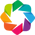

C:\Users\18125\AppData\Local\Temp\ipykernel_1704\4012573274.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_scores = df.mean()[2:-2].reset_index(name='score')


:Bars   [index]   (score)

In [6]:
import pandas as pd
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('Sentiments.csv')

# Calculate the average emotion scores for each column
average_scores = df.mean()[2:-2].reset_index(name='score')

# Create a bar chart using Holoviews
bars = hv.Bars(average_scores, 'index', 'score', label='Emotion Analysis')

# Set the style options for the chart
opts.defaults(
    opts.Bars(height=400, width=600, color=hv.Cycle('Category20')),
    opts.NdLayout(shared_axes=False),
    opts.Layout(toolbar=None)
)

# Show the Holoviews plot
bars


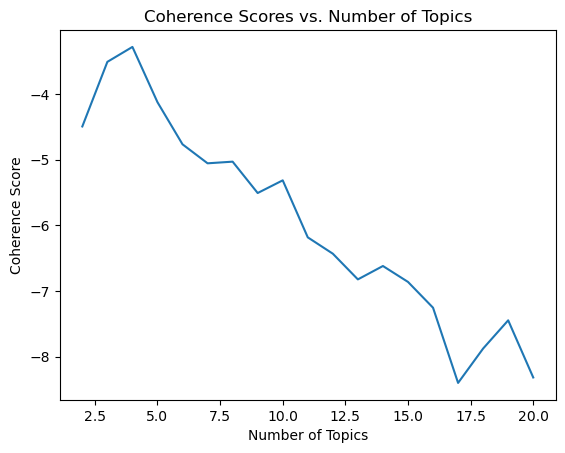

Topic: 0 
Words: 0.076*" " + 0.015*"go" + 0.014*"GPT-4" + 0.012*"year" + 0.012*"  " + 0.011*"like" + 0.010*"human" + 0.010*"think" + 0.010*"OpenAI" + 0.008*"amp"
Topic: 1 
Words: 0.083*"million" + 0.073*"300" + 0.050*"report" + 0.047*" " + 0.042*"equivalent" + 0.025*"Goldman" + 0.025*"Sachs" + 0.019*"say" + 0.013*"intelligence" + 0.013*"time"
Topic: 2 
Words: 0.018*"work" + 0.016*"create" + 0.016*"new" + 0.014*"able" + 0.013*"think" + 0.013*"people" + 0.012*"company" + 0.011*"software" + 0.011*"engineer" + 0.010*"collar"
Topic: 3 
Words: 0.035*"people" + 0.030*" " + 0.023*"think" + 0.021*"go" + 0.016*"ai" + 0.015*"will" + 0.015*"need" + 0.014*"human" + 0.014*"work" + 0.012*"use"
Topic: 4 
Words: 0.036*"human" + 0.036*" " + 0.026*"chatgpt" + 0.019*"ChatGPT" + 0.016*"tool" + 0.011*"Google" + 0.010*"say" + 0.010*"use" + 0.010*"new" + 0.009*"future"


In [7]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import WordNetLemmatizer

# Load data into a pandas dataframe
df = pd.read_csv('Sentiments.csv')

# Define stop words and lemmatizer
nlp = spacy.load('en_core_web_sm')
stop_words = STOP_WORDS
lemmatizer = WordNetLemmatizer()

# Preprocess text data
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop and token.lemma_ != '-PRON-']
    return tokens

texts = [preprocess_text(text) for text in df['text']]

# Create dictionary of words and their frequency
dictionary = corpora.Dictionary(texts)

# Filter out words that occur in less than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert text to a bag of words representation
corpus = [dictionary.doc2bow(text) for text in texts]

# Evaluate number of topics using coherence score
coherence_scores = []
for num_topics in range(2, 21):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=42,
                                                update_every=1,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Plot coherence scores to find optimal number of topics
plt.plot(range(2, 21), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores vs. Number of Topics')
plt.show()

# Train the LDA model on the corpus with optimal number of topics
num_topics = coherence_scores.index(max(coherence_scores)) + 3
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=num_topics,
                                            random_state=42,
                                            update_every=1,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

# Print the topics and their corresponding words
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 1: ai, will, replace, jobs, it, ai will, will replace, you, but, can
Topic 2: ai, replace, will, jobs, it, job, be, your, that, but
Topic 3: ai, will, replace, jobs, you, it, be, but, job, ai will
Topic 4: ai, replace, it, will, that, jobs, job, can, you, will replace
Topic 5: ai, replace, jobs, will, can, what, we, that, you, how
Topic 6: ai, replace, jobs, that, will, job, it, can, people, be
Topic 7: ai, replace, that, jobs, it, will, job, be, you, but
Topic 8: ai, replace, that, will, jobs, job, you, be, it, will replace
Topic 9: replace, ai, jobs, could, could replace, million, 300, 300 million, ai could, million jobs
Topic 10: ai, replace, jobs, will, that, be, we, it, not, job


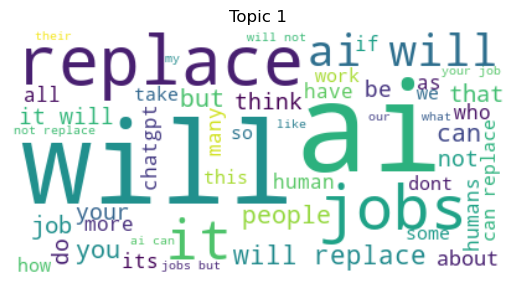

C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


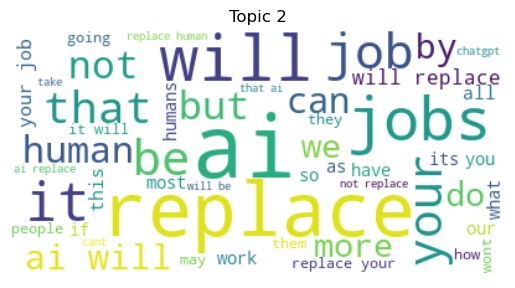

C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


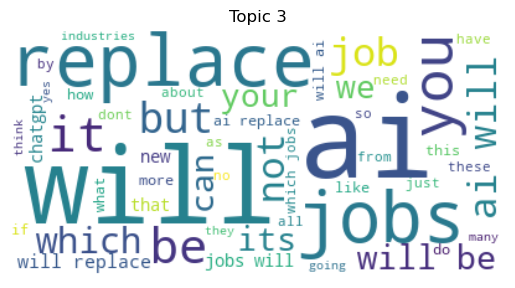

C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


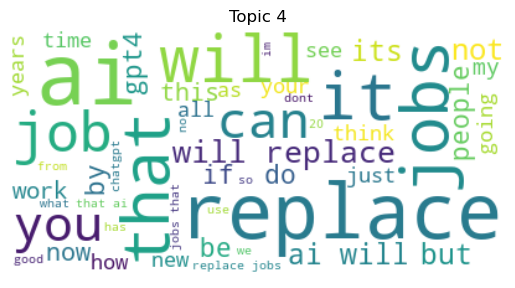

C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


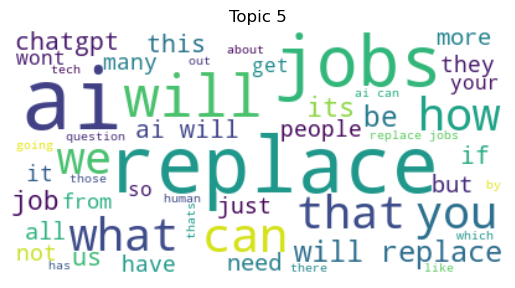

C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


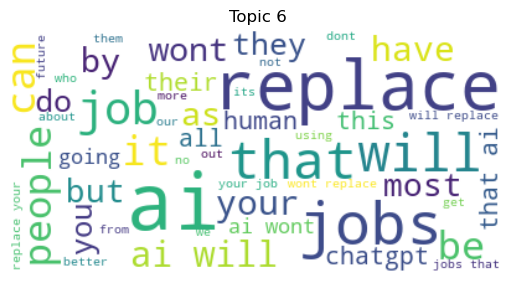

C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


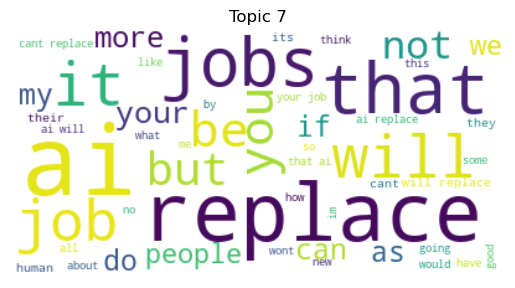

C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


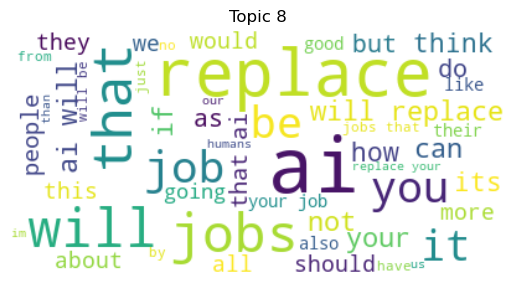

C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


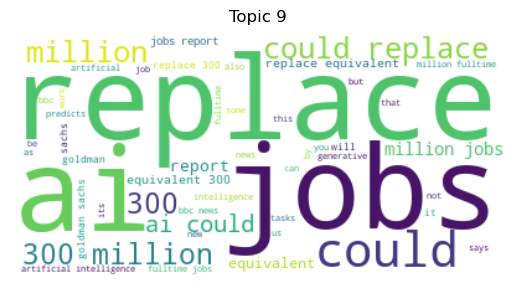

C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


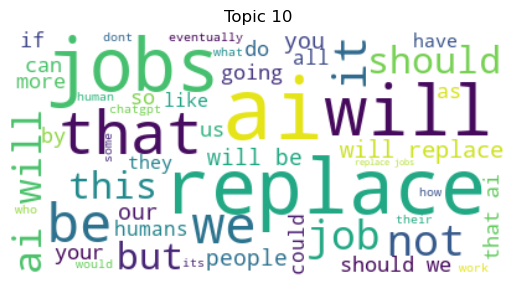

C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_fe

Top 10 words for Topic 1:
           word   frequency
0            ai  519.335258
1          will  432.500611
2       replace  417.318378
3          jobs  340.994161
4            it  271.207204
5       ai will  174.390434
6  will replace  136.695319
7           you  124.120868
8           but  119.951496
9           can  118.012980


Top 10 words for Topic 2:
      word   frequency
0       ai  255.381666
1  replace  184.925653
2     will  130.557149
3     jobs  118.994144
4       it   94.158511
5      job   78.829449
6       be   73.873260
7     your   69.732729
8     that   63.912187
9      but   50.211715


Top 10 words for Topic 3:
      word   frequency
0       ai  331.543569
1     will  280.839842
2  replace  261.771714
3     jobs  248.615414
4      you  155.710286
5       it  114.293656
6       be  110.009671
7      but   84.085453
8      job   73.212271
9  ai will   67.782332


Top 10 words for Topic 4:
           word   frequency
0            ai  130.857155
1       replace  105

C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_fe

Top 10 words for Topic 5:
      word  frequency
0       ai  98.259378
1  replace  81.292668
2     jobs  64.402509
3     will  43.289352
4      can  27.866950
5     what  24.935749
6       we  24.813702
7     that  24.759795
8      you  24.355955
9      how  23.882714


Top 10 words for Topic 6:
      word   frequency
0       ai  283.279244
1  replace  209.900037
2     jobs  155.828207
3     that  124.482194
4     will  115.973333
5      job   85.903896
6       it   66.141037
7      can   64.966269
8   people   62.670677
9       be   62.545256


Top 10 words for Topic 7:
      word   frequency
0       ai  286.502586
1  replace  191.111890
2     that  137.021090
3     jobs  130.444590
4       it  104.482182
5     will  101.527530
6      job   94.444283
7       be   71.838880
8      you   70.373848
9      but   60.752807


Top 10 words for Topic 8:
           word   frequency
0            ai  359.269496
1       replace  251.748796
2          that  168.559808
3          will  164.414088
4 

C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\18125\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
import pandas as pd
import numpy as np
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the combined data frame
df = pd.read_csv('CombinedData.csv')

# Create a list of stop words
stop_words = ['a', 'an', 'the', 'in', 'on', 'at', 'to', 'for', 'of', 'and', 'or', 'with', 'is', 'are', 'was', 'were'," "]

# Preprocess the text data
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    # Remove user mentions and hashtags
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#([^\s]+)', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply preprocessing to the text column
df['text'] = df['text'].apply(preprocess_text)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['text'])

# Train the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(X)

# Extract the top 10 topics and their top 10 words
topic_words = []
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [vectorizer.get_feature_names()[i] for i in top_words_idx]
    topic_words.append(', '.join(top_words))

# Print the top 10 topics and their top 10 words
for i, topic_words in enumerate(topic_words):
    print(f"Topic {i+1}: {topic_words}")

# Generate a word cloud for each topic
for topic_idx, topic in enumerate(lda.components_):
    wordcloud = WordCloud(background_color='white', max_words=50).generate_from_frequencies(dict(zip(vectorizer.get_feature_names(), topic)))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_idx+1}')
    plt.show()

# Generate a frequency table for each topic
for topic_idx, topic in enumerate(lda.components_):
    words = vectorizer.get_feature_names()
    frequencies = topic
    freq_table = pd.DataFrame({'word': words, 'frequency': frequencies})
    freq_table = freq_table.sort_values('frequency', ascending=False).reset_index(drop=True)
    print(f"Top 10 words for Topic {topic_idx+1}:")
    print(freq_table.head(10))
    print("\n")


In [9]:
import pandas as pd
import altair as alt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define stop words
stop_words = set(stopwords.words('english'))

# Assume lda_model and corpus are defined
topics = lda_model.show_topics(num_topics= 6, formatted=False)
topic_dfs = []
for topic_num, topic in topics:
    # Tokenize and filter out stop words
    terms = [(term, weight) for term, weight in topic]
    filtered_terms = [(term, weight) for term, weight in terms if term not in stop_words]
    
    # Create DataFrame from filtered terms
    term_weights = {term: weight for term, weight in filtered_terms}
    df = pd.DataFrame({'term': term_weights.keys(), 'weight': term_weights.values()})
    df['topic'] = f'Topic {topic_num}'
    topic_dfs.append(df.head(3))
df = pd.concat(topic_dfs)

chart = alt.Chart(df).mark_bar().encode(
    x='weight:Q',
    y=alt.Y('term:N', sort='-x'),
    color=alt.Color('topic:N', legend=alt.Legend(title='Topic')),
    tooltip=['term:N', 'weight:Q']
).properties(
    width=580,
    height=300,
    title='Topic Term Distribution'
)
chart.configure_axis(
    labelFontSize=16,
    titleFontSize=20
).configure_legend(
    labelFontSize=14,
    titleFontSize=16
)


alt.Chart(...)

In [10]:
# Group by topic and calculate the sum of weights for each term
result_df = df.groupby(['topic', 'term']).sum().reset_index()

# Pivot the table to obtain topics as columns and terms as rows
result_df = result_df.pivot(index='term', columns='topic', values='weight').fillna(0)

# Calculate the total weight for each term across all topics
result_df['Total'] = result_df.sum(axis=1)

# Sort the dataframe by descending total weight
result_df = result_df.sort_values(by='Total', ascending=False)

# Print the resulting dataframe
result_df


topic     Topic 0   Topic 1   Topic 2   Topic 3   Topic 4     Total
term                                                               
         0.076349  0.000000  0.000000  0.029635  0.035547  0.141531
million  0.000000  0.082785  0.000000  0.000000  0.000000  0.082785
300      0.000000  0.072754  0.000000  0.000000  0.000000  0.072754
report   0.000000  0.050125  0.000000  0.000000  0.000000  0.050125
human    0.000000  0.000000  0.000000  0.000000  0.036265  0.036265
people   0.000000  0.000000  0.000000  0.035483  0.000000  0.035483
chatgpt  0.000000  0.000000  0.000000  0.000000  0.025648  0.025648
think    0.000000  0.000000  0.000000  0.023038  0.000000  0.023038
work     0.000000  0.000000  0.017820  0.000000  0.000000  0.017820
create   0.000000  0.000000  0.016476  0.000000  0.000000  0.016476
new      0.000000  0.000000  0.015712  0.000000  0.000000  0.015712
go       0.014794  0.000000  0.000000  0.000000  0.000000  0.014794
GPT-4    0.013783  0.000000  0.000000  0.000000  0.000000  0.013783

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import silhouette_score
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


# Load data
df = pd.read_csv('CombinedData_sentiment.csv')

# Preprocess text data
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Perform sentiment analysis
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text'])

# Perform clustering
n_clusters = 3
km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1, verbose=False)
km.fit(X)

# Analyze clustering results
df['cluster'] = km.labels_
for i in range(n_clusters):
    cluster_df = df[df['cluster'] == i]
    print(f'Cluster {i}: {len(cluster_df)} observations')
    print(f'  Average sentiment score: {cluster_df["sentiment_score"].mean():.2f}')
    print(f'  Positive sentiment ratio: {len(cluster_df[cluster_df["sentiment_score"] > 0]) / len(cluster_df):.2%}')
    print(f'  Negative sentiment ratio: {len(cluster_df[cluster_df["sentiment_score"] < 0]) / len(cluster_df):.2%}')
    print(f'  Most common reactions: {Counter(" ".join(cluster_df["text"]).split()).most_common(5)}')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\18125\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster 0: 301 observations
  Average sentiment score: 0.07
  Positive sentiment ratio: 21.59%
  Negative sentiment ratio: 5.65%
  Most common reactions: [('jobs', 330), ('could', 320), ('replace', 316), ('million', 304), ('300', 299)]
Cluster 1: 9986 observations
  Average sentiment score: 0.16
  Positive sentiment ratio: 51.85%
  Negative sentiment ratio: 24.64%
  Most common reactions: [('ai', 11181), ('jobs', 10906), ('replace', 10129), ('0400', 9514), ('people', 1810)]
Cluster 2: 4263 observations
  Average sentiment score: 0.20
  Positive sentiment ratio: 57.24%
  Negative sentiment ratio: 23.57%
  Most common reactions: [('ai', 5454), ('job', 4681), ('replace', 4578), ('0400', 4253), ('people', 701)]


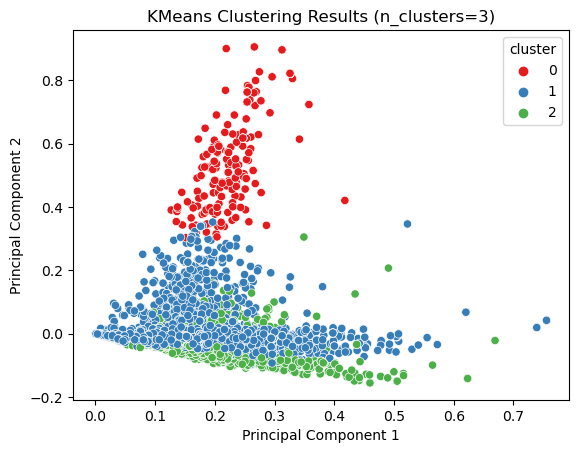

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce dimensionality of text data
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X.toarray())

# Plot clusters
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=df['cluster'], palette='Set1')
plt.title(f'KMeans Clustering Results (n_clusters={n_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
